# Homework 0

## Setup: Differentiation as matrices

So far we have written functions of the form `diff(x, u)` that compute derivatives.  These functions happen to have been linear in `u`.  We should be able to write differentiation as a matrix $D$ such that

$$ u'(x) = D u(x) $$

where $x$ is the vector of $n$ discrete points, thus $u(x)$ is also a vector of length $n$.

## Problems

* Write a function `diffmat(x)` that returns a matrix $D$ that computes first derivatives.
* Write a function `diff2mat(x)` that returns a matrix $D_2$ that computes second derivatives.
* Use test solutions to determine the order of accuracy of your methods for evenly and non-evenly spaced points.  Which norm did you use?

## #1: First Derivatives

Given $n$ discrete points (arranged in nondecreasing order in a vector $x$), we can approximate the derivative of a function $u$ applied to these points using finite differences. For the endpoints, we will use one-sided differences, but central differences for the interior points.

Starting with the central differences, we will approximate the derivative $u'(x_i)$ with

$$ \begin{align*} u'(x_i) \approx \frac{u(x_{i+1}) - u(x_{i-1})}{x_{i+1} - x_{i-1}} \end{align*} $$

To achieve the numerator with a matrix, we can multiply by the elements adjacent to the diagonal, using a matrix like this (for the $n=5$ case):

$$
\begin{bmatrix}
\begin{array}{cccc}
 - &  - &  - &  - &  - \\
-1 &  0 &  1 &  0 &  0 \\
 0 & -1 &  0 &  1 &  0 \\
 0 & 0  & -1 &  0 &  1 \\
 - &  - &  - &  - &  - \\
\end{array}
\end{bmatrix} 
$$

For $Du(x)$ to be second-order accurate, we need to use one-sided differences with second-order accuracy. Forward and backward difference approximations with this accuracy are, respectively

$$
\begin{align*}
u''(x) &\approx \frac{-3u(x_{i}) + 4u(x_{i+1}) - u(x_{i+2)}{(x_{i+2} - x_{i})^2}\\
u''(x) &\approx \frac{u(x_{i}) - 2 u(x_{i-1}) + u(x_{i-2})}{(x_{i} - x_{i-2})^2}
\end{align*}
$$

For the forward and backward differences from the first and last rows, we will use the element from the diagonal and the one adjacent to it, giving a $D$ matrix like

$$
M_{num} = \begin{bmatrix}
\begin{array}{cccc}
-1 &  1 &  0 &  0 &  0 \\
-1 &  0 &  1 &  0 &  0 \\
 0 & -1 &  0 &  1 &  0 \\
 0 &  0 & -1 &  0 &  1 \\
 0 &  0 &  0 & -1 &  1 \\
\end{array}
\end{bmatrix} 
$$

For the denominators of the central differences, we divide the elements in each row $i$ by $(x_{i+1} - x_{i-1})$. We also divide the first row by $(x_{i+1} - x_{i})$ for the forward difference and the last row by $(x_{i} - x_{i-1})$ for the backward difference. 

For the $n=5$ example, this could be represented in a matrix as

$$ 
\begin{align*}
c &= x_{i + 1} - x_{i - 1} \\
f &= x_{i + 1} - x_i \\
b &= x_i - x_{i - 1}
\end{align*}
$$

$$
M_{den} = \begin{bmatrix}
\begin{array}{cccc}
f & 0 & 0 & 0 & 0 \\
0 & c & 0 & 0 & 0 \\
0 & 0 & c & 0 & 0 \\
0 & 0 & 0 & c & 0 \\
0 & 0 & 0 & 0 & b \\
\end{array}
\end{bmatrix} 
$$

Using the matrices above, we would calculate $D$ as

$$D = M_{den} * M_{num} $$

In [13]:
%precision 3
%matplotlib notebook

import numpy
from matplotlib import pyplot
pyplot.style.use('ggplot')


In [14]:
# Write a function diffmat(x) that returns a matrix D that computes first 
# derivatives.

def calcH(x):
    '''
    Given a 1D numpy array x of length n, returns a vector of h values
    for use with finite difference methods applied to x.
    
    Each element H[i] corresponds to the value for the denominator of x[i]'s 
    difference. Endpoints use one-sided differences, while interior points 
    use central differences.
    '''
    upperPoints = numpy.roll(x, -1)
    upperPoints[-1] = x[-1]
    lowerPoints = numpy.roll(x, 1)
    lowerPoints[0] = x[0]
    
    return upperPoints - lowerPoints

def diffmat(x):
    '''
    Given a 1D numpy array x of length n, returns an n x n matrix D that can
    approximate first derivatives when multiplied with u(x)

    That is, u'(x) = D * u(x)
    '''
    n = len(x)
    e = numpy.ones(n - 1)
    
    # For interior points, use central difference
    numerators = (numpy.zeros(n) + numpy.diag(e, 1) - numpy.diag(e, -1))
    
    # At the endpoints, use forward/backward difference
    numerators[0,0] = -1
    numerators[-1,-1] = 1
    
    # Calculate the denominators for the finite differences and form a matrix 
    # to apply them. 
    h = calcH(x)
    applyDenom = numpy.diag(1 / h)
    
    return numpy.dot(applyDenom, numerators)


## #2: Second Derivatives

Creating a matrix $D_2$ to approximate second derivatives will follow the same general approach of creating $D$. We will use second-order finite differences: one-sided differences for the endpoints and central differences for the interior points.

Starting with the central differences, we will approximate the derivative $u''(x_i)$ with

$$ \begin{align*} u''(x_i) \approx \frac{u(x_{i+1}) - 2u(x_{i}) + u(x_{i-1})}{(x_{i+1} - x_{i-1})^2} \end{align*} $$

To achieve the numerator with a matrix, we can multiply by the elements adjacent to the diagonal, using a matrix like this (for the $n=5$ case):

$$
\begin{bmatrix}
\begin{array}{cccc}
 - &  - &  - &  - &  - \\
 1 & -2 &  1 &  0 &  0 \\
 0 &  1 & -2 &  1 &  0 \\
 0 & 0  &  1 & -2 &  1 \\
 - &  - &  - &  - &  - \\
\end{array}
\end{bmatrix} 
$$

The forward and backward difference formulas are, respectively

$$
\begin{align*}
u''(x) &\approx \frac{u(x_{i+2}) - 2 u(x_{i+1}) + u(x_i)}{(x_{i+2} - x_{i})^2}\\
u''(x) &\approx \frac{u(x_{i}) - 2 u(x_{i-1}) + u(x_{i-2})}{(x_{i} - x_{i-2})^2}
\end{align*}
$$

For the forward and backward differences from the first and last rows, we will use the element from the diagonal and the one adjacent to it, giving a $D$ matrix like

$$
M_{2,num} = \begin{bmatrix}
\begin{array}{cccc}
 1 & -2 &  1 &  - &  - \\
 1 & -2 &  1 &  0 &  0 \\
 0 &  1 & -2 &  1 &  0 \\
 0 & 0  &  1 & -2 &  1 \\
 - &  - &  1 & -2 &  1 \\
\end{array}
\end{bmatrix} 
$$

For the denominators of the central differences, we divide the elements in each row $i$ by $(x_{i+1} - x_{i-1})$. We also divide the first row by $(x_{i+1} - x_{i})$ for the forward difference and the last row by $(x_{i} - x_{i-1})$ for the backward difference. 

The denominator-applying matrix will follow the same format as that for the first derivative, but with the following values:

$$ 
\begin{align*}
c &= x_{i + 1} - x_{i - 1} \\
f &= x_{i + 2} - x_i \\
b &= x_i - x_{i - 2}
\end{align*}
$$

We would then calculate $D_2$ as

$$D_2 = M_{2,den} * M_{2,num} $$

Note that, with this approximation, the values at the endpoints will always be the same as the values adjacent to them.

In [15]:
# Write a function diff2mat(x) that returns a matrix D2 that computes second 
# derivatives.

def calcHSecondOrder(x):
    '''
    Given a 1D numpy array x of length n, returns a vector of h values
    for use with finite difference methods for second-order derivatives
    applied to x.
    
    Each element H[i] corresponds to the value for the denominator of x[i]'s 
    difference. Endpoints use one-sided differences, while interior points 
    use central differences.
    '''
    upperPoints = numpy.roll(x, -1)
    upperPoints[-1] = x[-1]
    upperPoints[0] = x[2]
    lowerPoints = numpy.roll(x, 1)
    lowerPoints[0] = x[0]
    lowerPoints[-1] = x[-3]
    
    return upperPoints - lowerPoints

def diff2mat(x):
    '''
    Given a 1D numpy array x of length n, returns an n x n matrix D2 that can
    approximate second derivatives when multiplied with u(x)

    That is, u''(x) = D2 * u(x)
    '''
    n = len(x)
    diagonal = numpy.diag(numpy.ones(n) * -2)
    e = numpy.ones(n - 1)
    
    # For interior points, use central difference
    numerators = diagonal + numpy.diag(e, 1) + numpy.diag(e, -1)
    
    # At the endpoints, use forward/backward difference
    numerators[0, :] = numerators[1, :]
    numerators[-1, :] = numerators[-2, :]
        
    # Calculate the denominators for the finite differences and form a matrix 
    # to apply them.
    h = calcHSecondOrder(x)
    applyDenom = numpy.diag(1 / ((h / 2) ** 2))
    
    return numpy.dot(applyDenom, numerators)


## #3: Testing

I'll use $u(x) = \cos(x)$ as my test function.

In [16]:
# First test function: u(x) = cos(x)
u_n =         lambda n: numpy.cos(n)
u_prime_n =   lambda n: -1 * numpy.sin(n)
u_prime_2_n = lambda n: -1 * numpy.cos(n)

# u_n =         lambda x: numpy.sin(x)
# u_prime_n = lambda x: numpy.cos(x)
# u_prime_2_n =   lambda x: -1 * numpy.sin(x)

# u_n =         lambda x: 1 + x + x**2/2 + x**3/6
# u_prime_n =   lambda x: 1 + x + x**2/2
# u_prime_2_n = lambda x: 1 + x

For a quick check of how the approximations compare to the true values, I plotted them against each other.

<IPython.core.display.Javascript object>


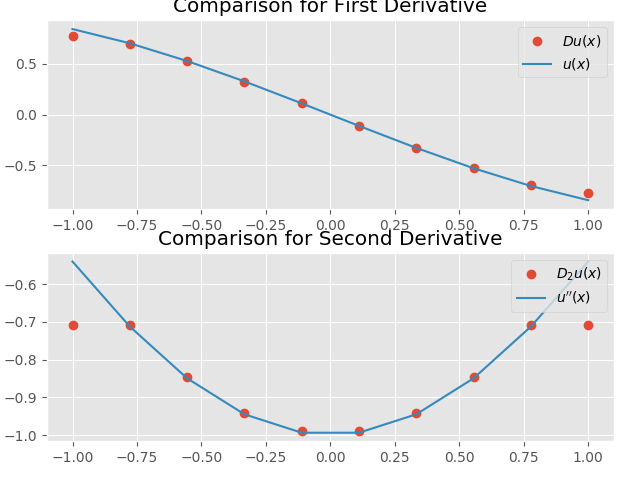

In [32]:
x = numpy.linspace(-1, 1, 10)
xView = numpy.atleast_2d(x).T

d1 = diffmat(x)
uPrime = u_prime_n(xView)
uPrimeApprox = numpy.dot(d1, u_n(xView))

d2 = diff2mat(x)
uPrime2 = u_prime_2_n(xView)
uPrime2Approx = numpy.dot(d2, u_n(xView))

fig, (axis1, axis2) = pyplot.subplots(2, 1)
fig.tight_layout()

#axis1.subplot(211)
axis1.plot(xView, uPrimeApprox, 'o', label="$Du(x)$")
axis1.plot(xView, uPrime, '-', label="$u(x)$")
axis1.legend(loc='upper right')
axis1.set_title('Comparison for First Derivative')

#axis2.subplot(212)
axis2.plot(xView, uPrime2Approx, 'o', label="$D_2u(x)$")
axis2.plot(xView, uPrime2, '-', label="$u''(x)$")
axis2.legend(loc='upper right')
axis2.set_title('Comparison for Second Derivative')


### Testing with Evenly Spaced Points

Moving on to the homework problem on testing, plots of grid refinement results using evenly-spaced points follow. Errors were calculated using an infinity norm.

<IPython.core.display.Javascript object>


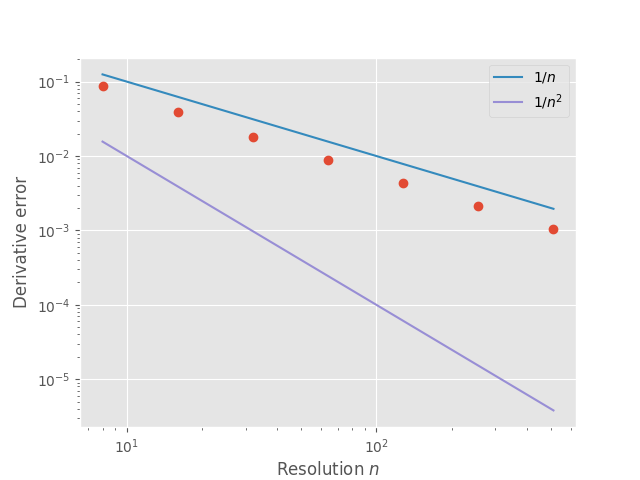

In [18]:
# Use test solutions to determine the order of accuracy of your methods for 
# evenly and non-evenly spaced points. Which norm did you use?
def gridRefinementError(f, actualFnc, diffMatFnc, grids):
    """
    At grid points on [-1, 1] spaced with the resolutions in grids, calculates 
    the error between the true derivative of a function f(x), f'(x), and its 
    approximation, D*f(x). Error values are calculated using an infinity norm.

    f: function to differentiate
    actualFnc: actual derivative function
    diffMatFnc: function returning differentiation matrix
    grids: resolutions of grids to use
    """
    error = []
    
    for n in grids:
        x = numpy.linspace(-1, 1, n)
        d = diffMatFnc(x)
        approxPoints = numpy.dot(d, f(x))
        
        error.append(numpy.linalg.norm(approxPoints - actualFnc(x), numpy.inf))
    return grids, error

grids = 2 ** numpy.arange(3,10)
ns, error = gridRefinementError(u_n, u_prime_n, diffmat, grids)

# Start a new figure and plot the error against comparison lines
pyplot.figure()
pyplot.loglog(ns, error, 'o')
pyplot.loglog(grids, grids**(-1.), label='$1/n$')
pyplot.loglog(grids, grids**(-2.), label='$1/n^2$')

# Label the graph
pyplot.xlabel('Resolution $n$')
pyplot.ylabel('Derivative error')
pyplot.legend(loc='upper right')


Although the central differences used for the interior are second-order accurate, the fist-order accurate one-sided differences used for the endpoints cause the approximation to have first-order accuracy overall.

Repeating this process for the second derivative approximation produces the following graph, which shows first-order accurady, as well.

<IPython.core.display.Javascript object>


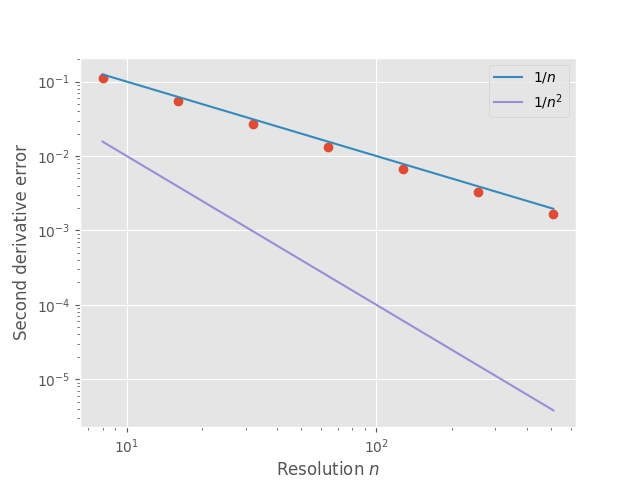

In [19]:
grids = 2 ** numpy.arange(3,10)
ns, error = gridRefinementError(u_prime_n, u_prime_2_n, diffmat, grids)

# Start a new figure and plot the error against comparison lines
pyplot.figure()
pyplot.loglog(ns, error, 'o')
pyplot.loglog(grids, grids**(-1.), label='$1/n$')
pyplot.loglog(grids, grids**(-2.), label='$1/n^2$')

# Label the graph
pyplot.xlabel('Resolution $n$')
pyplot.ylabel('Second derivative error')
pyplot.legend(loc='upper right')

### Testing with Random Spacing

The following code and plots repeat grid refinement tests like those above, but they use randomly placed grid points instead of evenly spaced points. Infinity norms were again used for error calculations.

The plot below shows results for the first derivative approximation, demonstrating first-order accuracy.

<IPython.core.display.Javascript object>


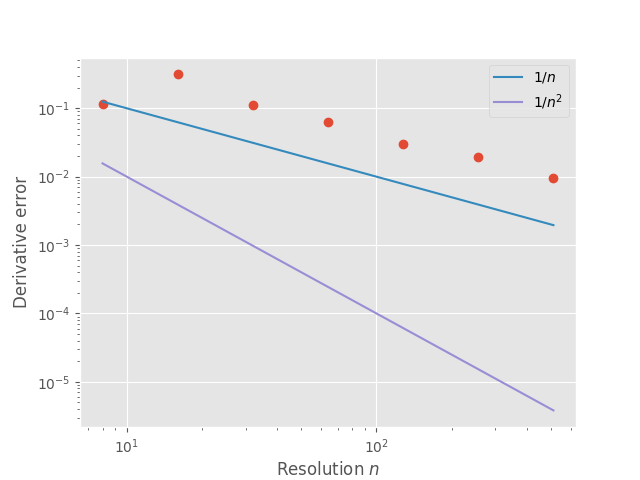

In [30]:
def gridRefinementErrorRandomSpacing(f, actualFnc, diffMatFnc, pointCounts):
    """
    At grid points on [-1, 1] spaced randomly, calculates the error between the 
    true derivative of a function f(x), f'(x), and its approximation, D*f(x). 
    Error values are calculated using an infinity norm.

    f: function to differentiate
    actualFnc: actual derivative function
    diffMatFnc: function returning differentiation matrix
    pointCounts: numbers of points to use for each test
    """
    error = []
    
    for n in pointCounts:
        x = numpy.sort(numpy.random.uniform(-1, 1, n))
        d = diffMatFnc(x)
        approxPoints = numpy.dot(d, f(x))
        
        error.append(numpy.linalg.norm(approxPoints - actualFnc(x), numpy.inf))
    return grids, error

grids = 2 ** numpy.arange(3,10)
ns, error = gridRefinementErrorRandomSpacing(u_n, u_prime_n, diffmat, grids)

# Start a new figure and plot the error against comparison lines
pyplot.figure()
pyplot.loglog(ns, error, 'o')
pyplot.loglog(grids, grids**(-1.), label='$1/n$')
pyplot.loglog(grids, grids**(-2.), label='$1/n^2$')

# Label the graph
pyplot.xlabel('Resolution $n$')
pyplot.ylabel('Derivative error')
pyplot.legend(loc='upper right')

The following plot shows first-order accuracy for the second derivative approximation.

<IPython.core.display.Javascript object>


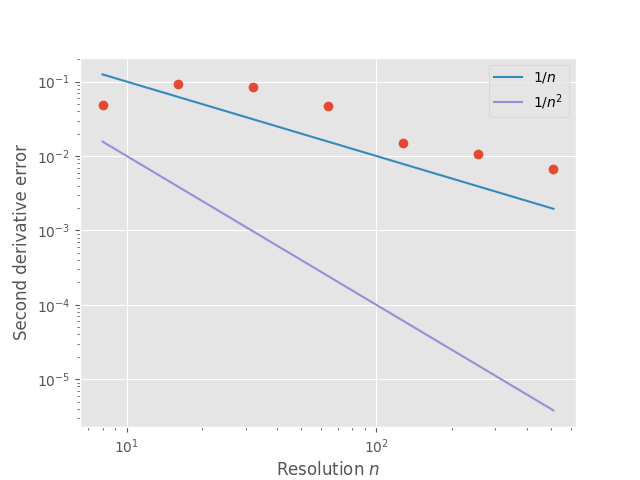

In [29]:
grids = 2 ** numpy.arange(3,10)
ns, error = gridRefinementErrorRandomSpacing(u_prime_n, u_prime_2_n, diffmat, grids)

# Start a new figure and plot the error against comparison lines
pyplot.figure()
pyplot.loglog(ns, error, 'o')
pyplot.loglog(grids, grids**(-1.), label='$1/n$')
pyplot.loglog(grids, grids**(-2.), label='$1/n^2$')

# Label the graph
pyplot.xlabel('Resolution $n$')
pyplot.ylabel('Second derivative error')
pyplot.legend(loc='upper right')